In [41]:
from manifold_learning import CCM
from manifold_learning.utils import utils
from manifold_learning.data.data_loader import get_truncated_lorenz_rand
import numpy as np
import matplotlib.pyplot as plt
import time
import torch

### Time statististics

In [96]:

def prepare_embeddings(N_sys):
    X = np.concatenate([get_truncated_lorenz_rand(280, n_steps=30000)[:,[0]].T for _ in range(N_sys)])
    X_emb = [utils.get_td_embedding_np(x[:, None], 5, 10, return_pred=False)[:, :, 0] for x in X]
    Y_emb = [utils.get_td_embedding_np(x[:, None], 5, 10, return_pred=False)[:, [0], 0] for x in X]
    return X_emb, Y_emb

def time_ccm_computation(X_emb, Y_emb, trials=15, device="cpu"):
    
    torch.cuda.empty_cache()
    ccm = CCM.FastCCM(device=device) 

    start_time = time.time()
    for _ in range(trials):
        ccm.compute(X_emb, Y_emb, 1000, 250, 30, 10, 0)
    total_time =  time.time() - start_time
    
    avg_time = total_time / trials * 1000
    time_per_pair = avg_time / len(X_emb) / len(Y_emb)
    
    return avg_time, time_per_pair




In [105]:
system_counts = [1, 2, 5, 10, 15, 20, 30, 50, 100, 150, 200, 300]

In [106]:
X_emb, Y_emb = prepare_embeddings(max(system_counts))

In [107]:

results_cpu = []
for count in system_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cpu")
    results_cpu += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 4.844173ms, Time per pair = 4.844173ms
N_sys=2: Avg time = 5.002149ms, Time per pair = 1.250537ms
N_sys=5: Avg time = 7.156261ms, Time per pair = 0.286250ms
N_sys=10: Avg time = 9.332784ms, Time per pair = 0.093328ms
N_sys=15: Avg time = 12.692102ms, Time per pair = 0.056409ms
N_sys=20: Avg time = 15.341632ms, Time per pair = 0.038354ms
N_sys=30: Avg time = 21.855529ms, Time per pair = 0.024284ms
N_sys=50: Avg time = 38.940128ms, Time per pair = 0.015576ms
N_sys=100: Avg time = 99.732272ms, Time per pair = 0.009973ms
N_sys=150: Avg time = 185.635837ms, Time per pair = 0.008250ms
N_sys=200: Avg time = 291.347392ms, Time per pair = 0.007284ms
N_sys=300: Avg time = 587.164625ms, Time per pair = 0.006524ms


In [108]:

results_cuda = []
for count in system_counts:
    avg_time, time_per_pair = time_ccm_computation(X_emb[:count], Y_emb[:count],device="cuda")
    results_cuda += [time_per_pair]
    print(f"N_sys={count}: Avg time = {avg_time:.6f}ms, Time per pair = {time_per_pair:.6f}ms")

N_sys=1: Avg time = 2.513774ms, Time per pair = 2.513774ms
N_sys=2: Avg time = 2.493048ms, Time per pair = 0.623262ms
N_sys=5: Avg time = 3.490305ms, Time per pair = 0.139612ms
N_sys=10: Avg time = 6.691202ms, Time per pair = 0.066912ms
N_sys=15: Avg time = 9.283940ms, Time per pair = 0.041262ms
N_sys=20: Avg time = 13.573170ms, Time per pair = 0.033933ms
N_sys=30: Avg time = 19.946321ms, Time per pair = 0.022163ms
N_sys=50: Avg time = 33.517281ms, Time per pair = 0.013407ms
N_sys=100: Avg time = 66.409095ms, Time per pair = 0.006641ms
N_sys=150: Avg time = 101.173369ms, Time per pair = 0.004497ms
N_sys=200: Avg time = 167.932510ms, Time per pair = 0.004198ms
N_sys=300: Avg time = 235.931317ms, Time per pair = 0.002621ms


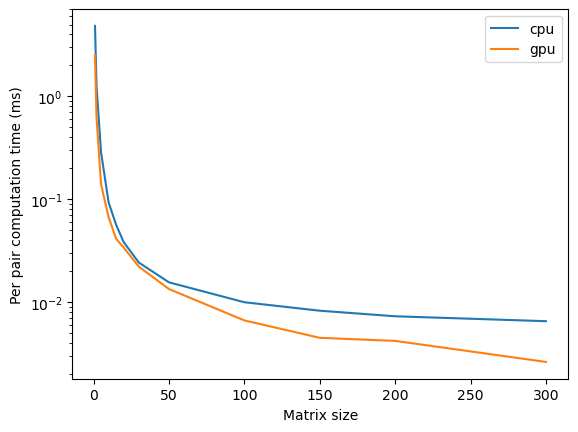

In [113]:
plt.plot(system_counts, results_cpu, label="cpu")
plt.plot(system_counts, results_cuda, label="gpu")
plt.yscale("log")
plt.xlabel("Matrix size")
plt.ylabel("Per pair computation time (ms)")
plt.legend()

In [119]:
torch.cuda.get_device_name()

'NVIDIA RTX 3500 Ada Generation Laptop GPU'